# VA Project Template

This template just loads and uses a few of the discussed libraries. Please follow the instruction in Moodle and feel free to remove/update any cells below.

In [1]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
#plots the figures in place instead of a new window
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import geopandas as gpd
import ipywidgets as widgets
import csv
import os.path
from ipywidgets import interact, interact_manual
from sklearn import manifold
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score

# Load Data
We chose data from AirBnB for the beautiful city or Barcelona (Spain). The data was gathered from [insideairbnb.com](http://insideairbnb.com/get-the-data.html). We picked the dataset files for listings, neighbourhoods, calendar, reviews as well as the geojson-file for the neighbourhoods to be able to draw a the points onto a map. Note: Calendar.csv **has to be unpacked** from the calendar.csv.gz file, as it was too large to commit to a git repository in its unpacked version. If you do not do so, the according read data cell will fail.

A description for the columns in listings.csv can be found here: https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896

In [2]:
#AirBnB Neighbourhood of Barcelona
neighbourhoods = pd.read_csv('data/neighbourhoods.csv')
neighbourhoods.head(10)

,neighbourhood_group,neighbourhood
0,Ciutat Vella,el Barri Gòtic
1,Ciutat Vella,el Raval
2,Ciutat Vella,la Barceloneta
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera"
4,Eixample,el Fort Pienc
5,Eixample,la Dreta de l'Eixample
6,Eixample,la Nova Esquerra de l'Eixample
7,Eixample,l'Antiga Esquerra de l'Eixample
8,Eixample,la Sagrada Família
9,Eixample,Sant Antoni


Listings is our largest data source and also has the most columns. However, we do not need all of them and therefore dropped them from our dataset. These include the host name or the date of the last review, as we did not see any point in keeping them for analyzing the data. Next on, we do also drop listings that do not have a price set yet (=0) or are outside of the price range per night of 2000 dollars. When we looked at the data, there were only very few samples with a value between greater 2000 but smaller 10000 (with the latter looking like a placeholder as well), but made sensible plotting very hard. Furthermore, paying more than 2000 dollars for one night seems to be out of proportion for nearly all AirBnB users.

In [3]:
#AirBnB listings of Barcelona
listings = pd.read_csv('data/listings.csv')
# throw away columns which are not needed for visualisation
# Here we throw away: host_name, last_review and the license because the information is either redundant or not 
# needed for visualisation
listings = listings.drop(['host_name', 'last_review','license'], axis=1)
listings = listings[(listings.price > 0) & (listings.price < 2000)]
listings.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,121,1,21,0.23,19,47,0
1,23197,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,90417,Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,220,4,52,0.74,2,86,0
2,32711,Sagrada Familia area - Còrsega 1,135703,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,144,2,63,0.60,3,85,0
3,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,181,4,156,1.55,2,136,7
4,35379,Double 04 CasanovaRooms Barcelona,152232,Eixample,l'Antiga Esquerra de l'Eixample,41.39036,2.15274,Private room,41,2,358,4.01,4,193,41


In [4]:
#THIS FILES COMES COMPRESSED : NEED FOR UNCOMPRESSING !
#AirBnB calendardata of Barcelona
calendar = pd.read_csv('data/calendar.csv')
calendar.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,18674,2021-10-11,f,$121.00,$121.00,3,1125
1,18674,2021-10-12,f,$121.00,$121.00,3,1125
2,18674,2021-10-13,f,$121.00,$121.00,3,1125
3,18674,2021-10-14,f,$121.00,$121.00,3,1125
4,18674,2021-10-15,f,$121.00,$121.00,3,1125
5,18674,2021-10-16,f,$121.00,$121.00,3,1125
6,18674,2021-10-17,f,$121.00,$121.00,3,1125
7,18674,2021-10-18,t,$121.00,$121.00,3,1125
8,18674,2021-10-19,t,$121.00,$121.00,3,1125
9,18674,2021-10-20,t,$121.00,$121.00,3,1125


In [5]:
#AirBnB reviews of Barcelona
reviews = pd.read_csv('data/reviews.csv')
reviews.head(10)

,listing_id,date
0,18674,2013-05-27
1,18674,2014-03-02
2,18674,2015-08-04
3,18674,2016-06-20
4,18674,2018-06-18
5,18674,2019-02-04
6,18674,2019-04-07
7,18674,2019-04-15
8,18674,2019-04-17
9,18674,2019-04-30


In [6]:
#Load city shape of barcelona
barcelona = gpd.read_file("data/neighbourhoods.geojson")

# 6. Analyze your dataset using descriptive statistics on the level of individual attributes.

For our first analysis, we wanted to show the distribution of prices per night. To make a meaningfull analysis, we split the data into 20 dollar bins and also made one cumulative bin for all listings with more than 800 dollar per night.

Obviously, the majority of appartments is in the lower price range, with two bins (40 and 60 dollar per night) with more than 2000 listings online on AirBnB. From 80 dollar upwards, the number of listings falls with a small bump at 320 dollar. From this onwards, very few listings are only available and even all listings form 800 to 2000 are only account for aroun 150 to 200 items. 

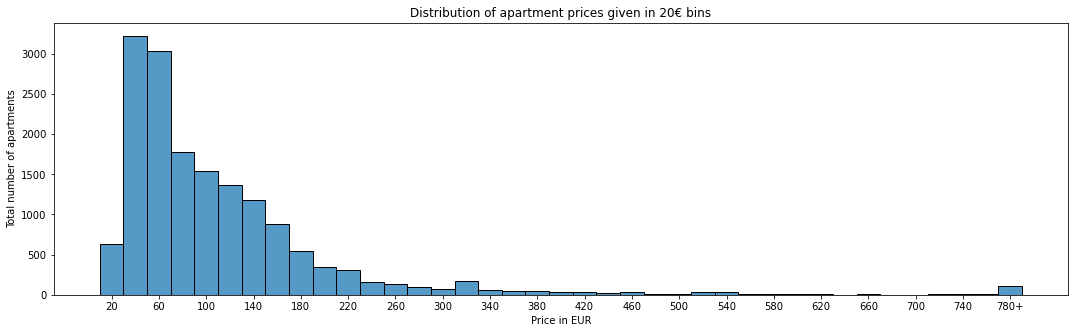

In [7]:
# define number of bins and make bins
binwidth = 20
bins = np.arange(0,800,binwidth) # create a bin collection from [0, 800] in steps of 20

# draw figure with histplot
plt.figure(figsize=(40,5))
ax = plt.subplot(121)
sns.histplot(np.clip(listings['price'], bins[0], bins[-1]), bins=bins)

# x ticks and center the labeling for a bin
xlabels = bins[1::2].astype(str)
xlabels[-1] += '+'
N_labels = len(xlabels)
plt.xticks(binwidth*2 * np.arange(N_labels) + (binwidth/2))
ax.set_xticklabels(xlabels);

# Title and axis labeling
plt.ylabel('Total number of apartments')
plt.xlabel('Price in EUR');
plt.title('Distribution of apartment prices given in 20€ bins');

Next, we were interessted in the distribution of prices in the different neighbourhood groups in Barcelona. To account for the large dataset from 0 to around 300 dollars per night and then ongoing very few, we split the data into three parts. One for everything smaller 300, one from 300 to 780 and the last taking all values above that.

For the lower price range, we picked a violine part as it represents the high count of datapoints better to us than the a boxplot. Noteably, neighbourhoods like Eixample or Gràcia feature more offerings in higher pricce range as other parts of Barcelona such as Nou Barris or Sant Andreu. The latter only realy feature appartments up to 100 dollar.

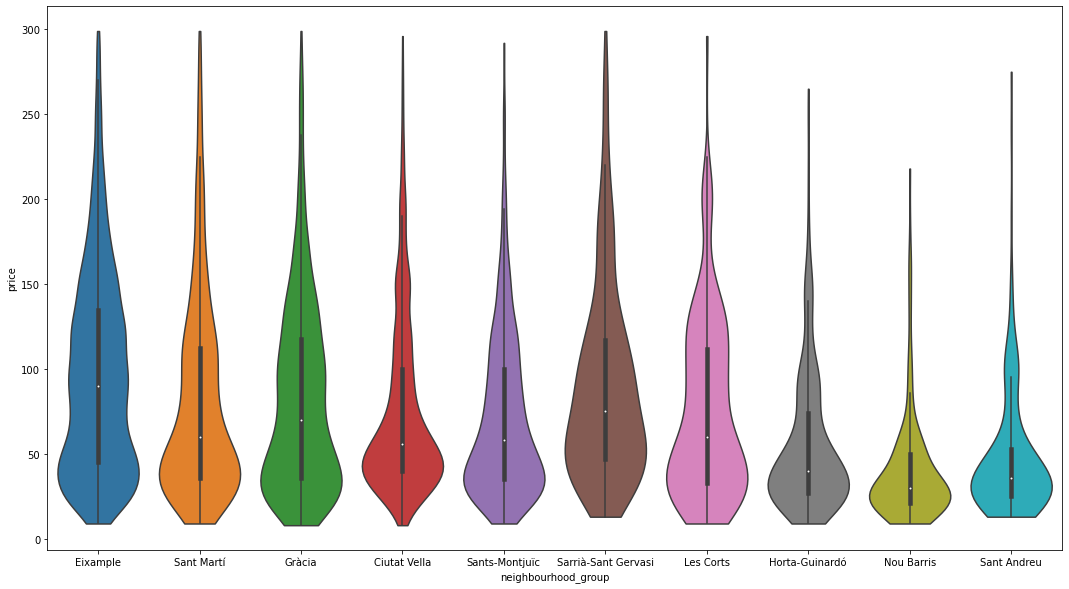

In [8]:
normalPricebasis = listings[(listings.price > 0) & (listings.price < 300)]
plt.figure(figsize=(40,10))
plt.subplot(121)
sns.violinplot(x='neighbourhood_group',y='price',data=normalPricebasis,cut=0,scale="width");

The medium price range is pretty interessting as the number of appartments do vary greatly between the different neighbourhood groups. As an example, Horta-Guinardò does not even feature 10 entries, whereas Eixample has more than a hundred. To better illustrate this, the individual data points are plotted as well. Because a boxplot needs at least 5 items to be meaningfull, we dropped all those neighbourhoods which offered less. This kicked out Nou Barris and Sant Andreu. Interesstingly, both have listed mostly low-cost appartments.

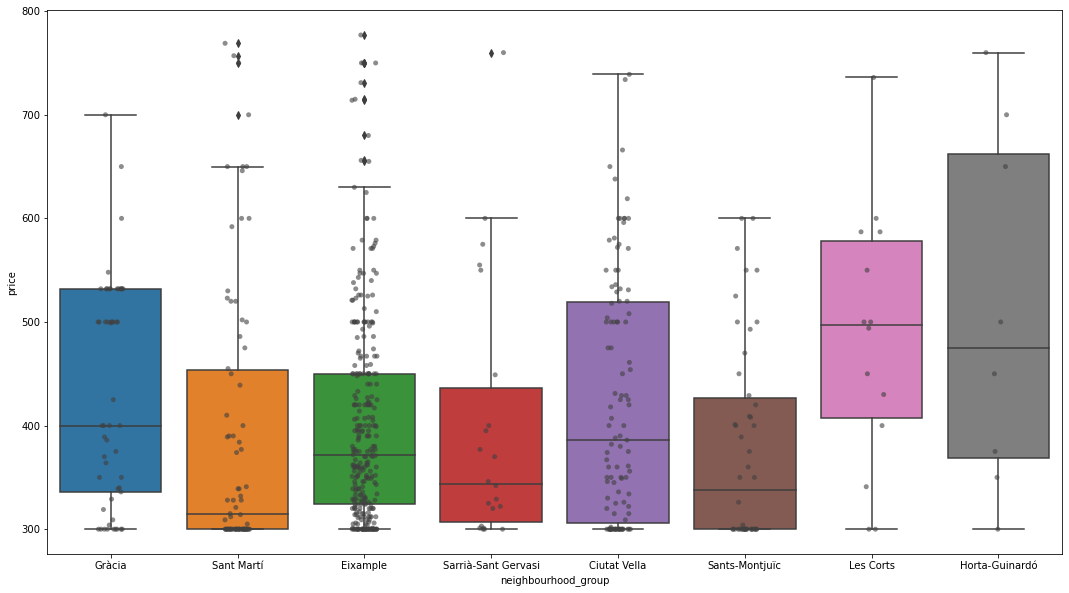

In [9]:
# Create data for medium prices and filter out everything that has less than 5 entries
mediumPricebasis = listings[(listings.price >= 300) & (listings.price < 780)]
mediumPricebasis = mediumPricebasis.groupby('neighbourhood_group')
mediumPricebasis = mediumPricebasis.filter(lambda x: len(x) > 5)
#Plot as boxplot and draw individual data points
plt.figure(figsize=(40,10))
plt.subplot(121)
sns.boxplot(x='neighbourhood_group',y='price',data=mediumPricebasis)
sns.stripplot(x='neighbourhood_group',y='price',data=mediumPricebasis, color='.25',alpha = 0.6);

The last price range, for any items over 780 dollars per night, gets the same treatment as the medium one. All neighbourhoods with less than 5 listings are thrown out to avoid boxplot plotting troubles. With this, only four groups are left with Eixample having the most listings of them, but also the the least scattered distribution of elements, even though there are outliers. Both Sarria-Sant Gervasi and Sant Marti have very few listings and, eventhough they can be plotted, both charts are not that meaningfull as the other two plots.

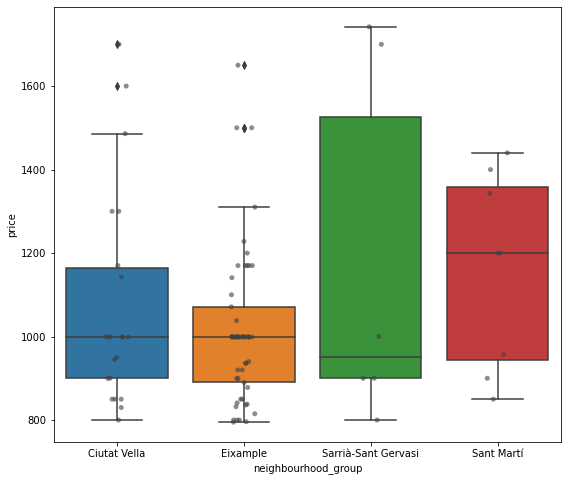

In [10]:
# Create data for top-notch prices and filter out everything that has less than 5 entries
luxuryPricebasis = listings[(listings.price >= 780)]
luxuryPricebasis = luxuryPricebasis.groupby('neighbourhood_group')
luxuryPricebasis = luxuryPricebasis.filter(lambda x: len(x) > 5)
#Plot as boxplot and draw individual data points
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.boxplot(x='neighbourhood_group',y='price',data=luxuryPricebasis)
sns.stripplot(x='neighbourhood_group',y='price',data=luxuryPricebasis, color='.25', alpha=0.6);

The last static plot is a visulation of all listings on a map of Barcelona, coloured by the neighbourhood group. Not surprising, most listings are clustered around the center of the city, where Eixample is located (and explains why there are so many listings). Adjacent districts like Cuitat Vellafeature a lot of listings as well.

<Figure size 432x288 with 0 Axes>

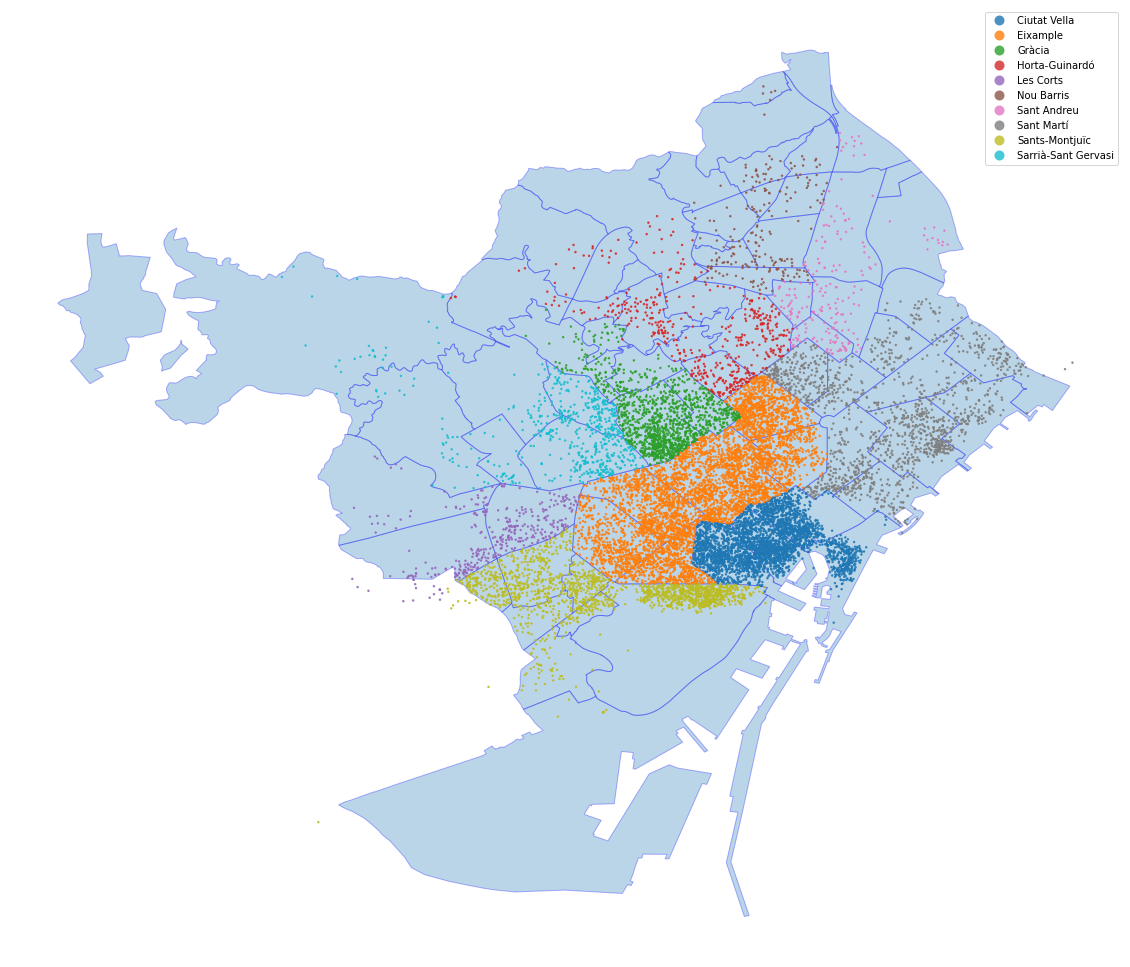

In [11]:
fig = plt.figure()
# Geoplot with the shape of barcelona
gdf = gpd.GeoDataFrame(listings, geometry=gpd.points_from_xy(listings.longitude, listings.latitude))
axe = barcelona.plot(figsize=(20,20), alpha=0.3, edgecolor='b') # plot base
# Plot datapoints for listing on it, colour-code by neighbourhood group
ax1 = gdf.plot(ax=axe, figsize=(20,20), alpha=0.8, markersize=2.2,column='neighbourhood_group', legend=True)
ax1.axis('off');

# 7. Analyze your dataset by looking at correlations between attributes (dimensions)

For correlation analytics, we decided to go for three heatmaps. The first one shows the correlation between the different room types and the neighbourhood they are located in. The second one is quite similiar, but focuses on the more affordable and relevant price range up to 300 dollars. The last graph has some accumulated data from different datasets and takes a look at the average price for a room in the different disctricts of Barcelona, starting from October 2021 up to October 2022.

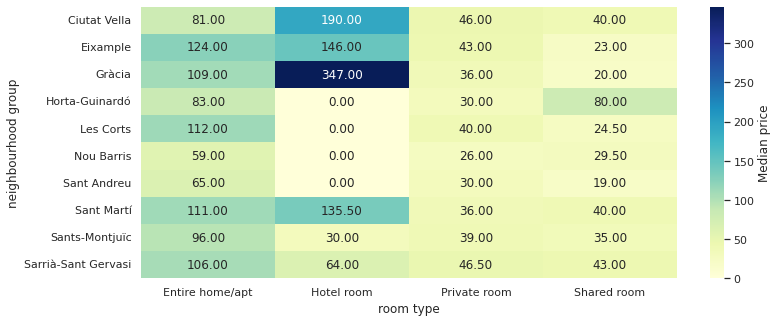

In [12]:
#x axis months, y axis neighbourhood_group,z axis price, fill empty aggregates with 0 value
df = pd.DataFrame(listings, columns=['room_type','neighbourhood_group', 'price']);
df = pd.pivot_table(df, columns=['room_type'], index=['neighbourhood_group'], values=['price'], aggfunc=np.median, fill_value=0)

sns.set(rc = {'figure.figsize':(12,5)}) # Set larger figure size
ax = sns.heatmap(df, cbar_kws={'label': 'Median price'}, cmap="YlGnBu", fmt=".2f", annot=True); # Create heatmap and set cbar label
ax.set(xlabel='room type', ylabel='neighbourhood group') # Set x label
ax.set_xticklabels(df.columns.get_level_values('room_type').to_list()); # Set ticks for xlabel with room types
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0); # Set ylabels to not be rotated 90 degrees
sns.reset_orig(); #Reset figure size to avoid troubles with upcomming charts

The first heatmap shows some valuable insights. First of, most private rooms are not much more expensive and sometimes even cheaper than shared rooms. Hotel rooms are typically the most expensive, but not available on all neighbourhood groups, these are indicated by the zero value. Last of all,there is also a difference for the average price of a room type accross the neighbourhoods, where some areas are nearly half the price of others. Obviously their geopgraphic locations is not as close to the must-be places, but that is a way to save money

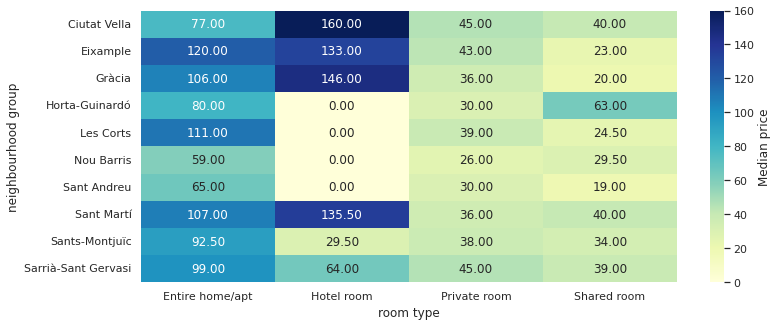

In [13]:
#x axis months, y axis neighbourhood_group,z axis price, fill empty aggregates with 0 value
df = pd.DataFrame(normalPricebasis, columns=['room_type','neighbourhood_group', 'price']);
df = pd.pivot_table(df, columns=['room_type'], index=['neighbourhood_group'], values=['price'], aggfunc=np.median, fill_value=0)

sns.set(rc = {'figure.figsize':(12,5)}) # Set larger figure size
ax = sns.heatmap(df, cbar_kws={'label': 'Median price'}, cmap="YlGnBu", fmt=".2f", annot=True); # Create heatmap and set cbar label
ax.set(xlabel='room type', ylabel='neighbourhood group') # Set x label
ax.set_xticklabels(df.columns.get_level_values('room_type').to_list()); # Set ticks for xlabel with room types
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0); # Set ylabels to not be rotated 90 degrees
sns.reset_orig(); #Reset figure size to avoid troubles with upcomming charts

The second heatmap, which is only for rooms up to 300 dollars, also offers some more valuable insights. First, that private rooms and shared rooms (the more price-moderate accommodations) are not changing much as they are typically not high-valued options. Secondly, that the huge outliers for hotel rooms are now much more moderate. Last of all, that prices on average have gove down for the entire homes or apartments, although there are not new surprising price-per-night champions.

Our last analysis for correlations shows the median price evolution of the certain districts over past and upcomming months. To do this, we first have to evaluate all the data for listings in all the districts and have to put it, with key data for the listing id and the date, into a dict, the listings prices as a value array. After this is done, we sum up all the listings with regard to their month and their respective neighbourhood and put it into our second dictionary, the monthlyData object and display it.

For performance reasons (when re-running the notebook and for further ease of analysis), the decision was made to store the calculated monthlyData into a CSV-file. If such a file is present, the data will be read from there, otherwise calculated. This cuts down the runtime from minutes for only this part down to a couple of seconds for the entire notebook. When new data sources for calendar, listings and neighbourhood are loaded or the months of analysitation are changed, the file has to be deleted as well. To state it once more: We did this to ease the programming and analysis and the cut down on runtime.

In [14]:
fpath = 'data/monthlyDistrictData.csv' # Path to storage csv-file
if not os.path.isfile(fpath):
    print("Generating data")
    intrDates = ['2021-10','2021-11','2021-12','2022-01','2022-02','2022-03','2022-04','2022-05','2022-06','2022-06','2022-07','2022-08','2022-09','2022-10']
    #{key: (hostid, month), value=median.[prices]}
    dat = calendar[['listing_id','date','price']]
    summary = {}
    for index, row in dat.iterrows():
        for possDat in intrDates:
            if possDat in row['date']:
                if not (int(row['listing_id']), possDat) in summary.keys():
                    summary[(int(row['listing_id']), possDat)] = []
                prc = float(row['price'][1:].replace(',',''))
                if prc < 5000:
                    summary[(int(row['listing_id']), possDat)].append(prc)
                break
    for key, val in summary.items():
        if not np.array(summary[key]).size == 0:
            summary[key] = np.median(np.array(summary[key]))
        else:
            summary[key] = 0.0

    # monthlyData = ['month_and_year','district','median price']
    monthlyData = {}
    for k, v in summary.items():
        filtered = listings[listings.id == k[0]]
        if len(filtered) > 0:
            neighGrp = filtered.iloc[0]['neighbourhood_group']
        else:
            neighGrp = 'unknown'
        if  len(filtered) > 0 and filtered.iloc[0]['price'] < 300:
            if not (k[1], neighGrp) in monthlyData.keys():
                monthlyData[(k[1], neighGrp)] = []
            monthlyData[(k[1], neighGrp)].append(v)

    for key, val in monthlyData.items():
        if not np.array(monthlyData[key]).size == 0:
            monthlyData[key] = np.mean(np.array(monthlyData[key]))
        else:
            monthlyData[key] = 0.0
    # save data because of calc overload
    with open(fpath, 'w', newline='', encoding='utf-8') as f:  
        writer = csv.writer(f)
        for k, v in monthlyData.items():
            writer.writerow([k, v])
else:
    print("Reading data from csv file")
    monthlyData = {}
    if os.path.isfile(fpath):
        with open(fpath,'r') as f:  
            for line in f: 
                if line.strip() != "":
                    split = line.strip().split(',')
                    k1 = split[0][2:]
                    k2 = split[1].strip()[1:].split('\'')[0]
                    v = split[2].strip()
                    monthlyData[(k1, k2)] = float(v)

Reading data from csv file


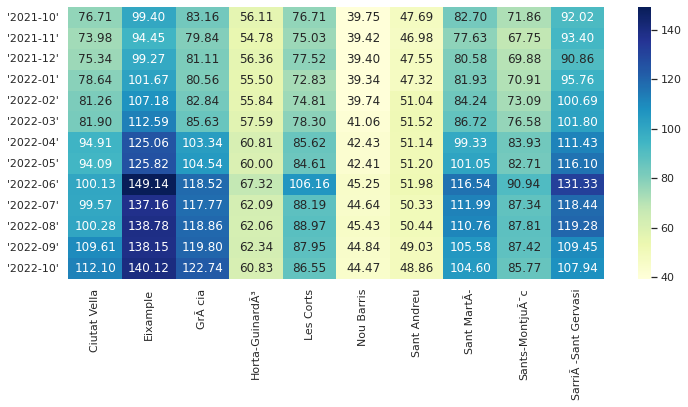

In [15]:
ser = pd.Series(list(monthlyData.values()),
                  index=pd.MultiIndex.from_tuples(monthlyData.keys()))
df = ser.unstack().fillna(0.0)
sns.set(rc = {'figure.figsize':(12,5)}) 
sns.heatmap(df, cmap="YlGnBu", fmt=".2f", annot=True);
sns.reset_orig(); #Reset figure size to avoid troubles with upcomming charts

An interessting insight is that the prices keep relativly steady over the winter, but make a sharp rie with the beginning of the warmer months such as April or May of 2022. After that, they to drop down again, but remain at a level in October 2022 which is for the pricier areas significantly higher than October 2021. An extreme case could be Cuitat Vella where the price in October 2022 is nearly 150% of October 2021.

 # 8. Cluster similar items and show the clustering result in a overview+detail visualization setup. 
 
 In the following three cells the extended listings dataset is loaded, since it yields even more interesting dimensions. As seen in the sourcecode, a list of 'wannaKnow' data attributes is created and the data is filtered according to the user input (filtering for neighbourhood_group, setting priceranges, scale the data before the clustering and select the clusteringalgorithm). After performing a clustering, the datrapoints are getting stored in the listingsExtended variable, which is globally accessible lateron to perform an detailed analysis of the data.
Important here is to mention, that data with NaN values in a certain columns gets thrown away, since it would not make sense to visualize pseudo data.

In [16]:
alt.data_transformers.disable_max_rows();
listingsExtended = None
allNeighbourhoods =  pd.read_csv('data/listingsext.csv')['neighbourhood_group_cleansed'].unique()

In [17]:
@interact(useStandardScaler=True,maxPrice=(15,5000), neighbourhoodGroup=[*['All'], *allNeighbourhoods])
def PCAcluster(useStandardScaler,maxPrice,neighbourhoodGroup):
    global listingsExtended
    listingsExtended = pd.read_csv('data/listingsext.csv')
    listingsExtended = listingsExtended[['neighbourhood_group_cleansed','price','bedrooms','beds','number_of_reviews','review_scores_rating','accommodates','host_acceptance_rate', 'host_response_time','host_response_rate','availability_365','room_type','instant_bookable']]
    listingsExtended.dropna(inplace=True)
    
    fixed = []
    for index, row in listingsExtended.iterrows():
        row['price'] = float(str(row['price']).replace('$','').replace(',',''))
        row['host_acceptance_rate'] = float(str(row['host_acceptance_rate']).replace('%',''))
        row['host_response_rate'] = float(str(row['host_response_rate']).replace('%',''))
        if row['price'] > 0 and row['price'] < maxPrice and (neighbourhoodGroup == 'All' or row['neighbourhood_group_cleansed'] == neighbourhoodGroup):
            fixed.append(row)
    listingsExtended = pd.DataFrame(fixed)

    selectedColumns = ['price','number_of_reviews','beds','review_scores_rating','accommodates','host_acceptance_rate','host_response_rate']
    wannaKnow = listingsExtended[selectedColumns]
    if useStandardScaler:
        wannaKnow =  StandardScaler().fit_transform(wannaKnow)
    
    pca = decomposition.PCA()
    pca_pos = pca.fit_transform(wannaKnow)
    listingsExtended['pca1']= pca_pos[:, 0]
    listingsExtended['pca2']= pca_pos[:, 1]
    
    coeff = pca.components_[0:2, :].T
    n = coeff.shape[0]

    scalex = 1.0/(listingsExtended['pca1'].max() - listingsExtended['pca1'].min())
    scaley = 1.0/(listingsExtended['pca2'].max() - listingsExtended['pca2'].min())
    plt.figure(figsize=(10, 10), dpi=80)
    plt.scatter(listingsExtended['pca1'] * scalex, listingsExtended['pca2'] * scaley, s=10, facecolor='black', alpha = 0.4)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.8)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, selectedColumns[i], color = 'red', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.show()

interactive(children=(Checkbox(value=True, description='useStandardScaler'), IntSlider(value=2507, description…

# Interpretation of decomposition on the extended dataset:
# PCA:
A triplot is a representation of categorical centroids, vector loadings and  object scores. In our dataset we can see that when the maxPrice is getting higher, the representation shows almost the exact same features about variable loadings. The variables load all different well in both dimensions. This loading will be described in the list of variables below:
<li>
    beds: The amount of beds loads almost only in dimension one and not so well in the second dimension.
</li>
<li>
    price: As well as the beds, the price is loading almost only in dimension one too. So this means, the more beds there are, the more higher the price.
</li>
<li>
    accommodates: There is a good correlation between the  amount of beds, the price and the number of accommodates which can be seen here.
</li>
<li>
    review_scores_rating: This variable loads almost zero in dimension1 bot not so much in dimension 2 either, so it doen't have a strong relevance.
</li>
<li>
    number_of_reviews:  Looking at Review Score Rating and Number of Reviews we can see that they have a small angle one to each other. This means that those properties with higher number of reviews tend to score higher in reviews.
</li>
<li>
    host_acceptance_rate: This variable is very strong in the second dimension and correlates well with the host response rate and the number of reviews.
</li>
<li>
    host_response_rate: The better the host response rate, the better the host acceptance rate and the number of reviews go up. These have a very small angle to each other so they tend to get better if the host response is good.
</li>

## Analyse Data from cluster algorithm (detailed view)
In the following it is possible e.g. for the PCA to take the datasamples, stored in the global available variable 'listingsExtended' and color each and every datapoint based on different attributes e.g. room_type. Furthermore the user can then select a cluster (based on coloring) in the histogram, which should be displayed in the left plot of the PCA. Important: run the previous 2 cells before this and also click on 'Run interact'!

In [18]:
@interact(PCA_labeling=['room_type','instant_bookable','bedrooms','neighbourhood_group_cleansed'])
def anaylseData(PCA_labeling):
    global listingsExtended
    if listingsExtended is None:
        return
    click = alt.selection_multi(encodings=['color'])
    
    chart = alt.Chart(listingsExtended).mark_point().encode(
        alt.X('pca1'),
        alt.Y('pca2'),
        color=f'{PCA_labeling}:N',
        tooltip=['price']
    ).transform_filter(
        click
    )
    chart = chart.add_selection(alt.selection_single())
    
    histCount = alt.Chart(listingsExtended).mark_bar().encode(
        x='count()',
        y=PCA_labeling,
        color=alt.condition(click, f'{PCA_labeling}:N', alt.value('lightgray'))
    ).add_selection(
        click
    )

    histPrice = alt.Chart(listingsExtended).mark_bar().encode(
        x='mean(price)',
        y=PCA_labeling,
        color=alt.condition(click, f'{PCA_labeling}:N', alt.value('lightgray'))
    ).add_selection(
        click
    )
    
    histAcc = alt.Chart(listingsExtended).mark_bar().encode(
        x='mean(accommodates)',
        y=PCA_labeling,
        color=alt.condition(click, f'{PCA_labeling}:N', alt.value('lightgray'))
    ).add_selection(
        click
    )
    
    return alt.hconcat(
        chart,
        histCount&histPrice&histAcc, 
        data=listingsExtended
    ).resolve_legend(color="independent",size="independent")

interactive(children=(Dropdown(description='PCA_labeling', options=('room_type', 'instant_bookable', 'bedrooms…

## Interpretation of PCA on the extended dataset:

<li>
    room_type: The Private Room is mostly clustered in the negative of the dimension one and around the point zero of dimension two but spreads along it. in contrary the Eintre home/apt is heavily clustered on the zero point of both dimensions. It spreads in both dimensions but more in the first dimension. Tehre are only a few shared rooms but we can see that they are a bit clustered in the negative of the dimensions. As for the Hotel Room, it spreads along the first dimension and gets clustered a bit in the negative and the zero point of the second dimension
</li>
<li>
    instant_bookable: The instant booklable variable clusters heavily in the zero point of both dimensions, no matter if it is or not and is more spread in the second dimension than in the first
</li>
<li>
    bedrooms: As the number of bedrooms grow, the colustering moves along the first dimension. but contrary, the fewer bedroomms, the more recourd are counted and the mean price goes down 
</li>
<li>
    neighbourhood_group_cleansed: Here we can see a clustering for every neighbourhood group on the zero point of both dimensions and is spreading quite equally in both dimensions. What stands out is the coutn of records in the neighbourhodd group Eixample. There are more than double records than in the second place of the record count.
</li>

# K-Means Clustering on the extendend dataset:

In [19]:
listingsExtended.head()

,neighbourhood_group_cleansed,price,bedrooms,beds,number_of_reviews,review_scores_rating,accommodates,host_acceptance_rate,host_response_time,host_response_rate,availability_365,room_type,instant_bookable,pca1,pca2
0,Eixample,121.0,3.0,6.0,21,4.40,8,86.0,within an hour,98.0,47,Entire home/apt,t,2.059850,0.283552
1,Sant Martí,220.0,3.0,5.0,52,4.74,6,73.0,within an hour,100.0,86,Entire home/apt,f,1.696792,0.216853
3,Ciutat Vella,181.0,4.0,6.0,156,4.52,9,86.0,within a few hours,100.0,136,Entire home/apt,f,2.703212,-0.360857
8,Ciutat Vella,36.0,1.0,1.0,81,4.74,1,79.0,within a few hours,90.0,242,Private room,f,-1.660455,-0.189750
10,Ciutat Vella,28.0,2.0,3.0,3,4.00,2,73.0,within an hour,100.0,257,Entire home/apt,f,-0.874174,0.362971


In [20]:
selOption = ['price', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating', 'accommodates', 'host_acceptance_rate', 'host_response_rate', 'availability_365']
@interact(xCriteria=selOption, yCriteria=selOption, cluster=(3, 9), iterations=(69, 420)) # haha funny sex number
def PCAcluster(xCriteria, yCriteria, cluster, iterations):
    data = pd.DataFrame(listingsExtended.loc[:, [xCriteria, yCriteria]])
    
    X_std = StandardScaler().fit_transform(data)
    km = KMeans(n_clusters=cluster, max_iter=iterations)
    preds = km.fit(X_std)
    centroids = km.cluster_centers_
    '''
    fig, ax = plt.subplots(figsize=(10, 10))
    for i in range(cluster):
        plt.scatter(X_std[km.labels_ == i, 0], X_std[km.labels_ == i,1], label=f"Cluster {i}")

    plt.scatter(centroids[:, 0], centroids[:, 1], marker ='o', s=100, label='Centroid')

    plt.legend()
    plt.xlabel(xCriteria)
    plt.ylabel(yCriteria)
    plt.title(f'{xCriteria} vs. {yCriteria}')
    ax.set_aspect('equal')
    '''
    
    panData = pd.DataFrame(data={f'{xCriteria}':X_std[:,0], f'{yCriteria}':X_std[:,1], 'cluster':km.labels_})
    panDataCentroid = panData.append(pd.DataFrame(data={f'{xCriteria}':centroids[:, 0], f'{yCriteria}':centroids[:, 1], 'cluster':'Centroid'}))

    
    click = alt.selection_multi(encodings=['color'])
    chart = alt.Chart(panDataCentroid).mark_point().encode(
        x = f'{xCriteria}',
        y = f'{yCriteria}',
        color='cluster:N'
    ).transform_filter(
        click
    )
    
    histCount = alt.Chart(panData).mark_bar().encode(
        x = alt.X('count()', title="Count"),
        y='cluster:N',
        color=alt.condition(click, 'cluster:N', alt.value('lightgray'))
    ).add_selection(
        click
    )
    
    histPrice = alt.Chart(panData).mark_bar().encode(
        x=f'mean({xCriteria})',
        y='cluster:N',
        color=alt.condition(click, 'cluster:N', alt.value('lightgray'))
    ).add_selection(
        click
    )
    
    histAcc = alt.Chart(panData).mark_bar().encode(
        x=f'mean({yCriteria})',
        y='cluster:N',
        color=alt.condition(click, 'cluster:N', alt.value('lightgray'))
    ).add_selection(
        click
    )

    return alt.hconcat(
        chart,
        histCount&histPrice&histAcc,
        data=panData
    ).resolve_legend(color="independent",size="independent")

interactive(children=(Dropdown(description='xCriteria', options=('price', 'bedrooms', 'beds', 'number_of_revie…